# Régression linéaire et méthodes bootstrap

## Table des matières

* [Introduction](#Introduction)
* [Régression linéaire](#Régression-linéaire)
* [Méthodes bootstrap](#Méthodes-bootstrap)
* [Application du bootstrap à la régression](#Application-du-bootstrap-à-la-régression)
* [Régressions avec R]()

## Introduction

Dans cette séance, nous allons voir comment effectuer une régression linéaire ordinaire ainsi qu'une régression linéaire pondérée. Nous verrons ensuite une méthode numérique pour obtenir un intervalle de confiance pour n'importe quel paramètre d'une distribution. En particulier, nous verrons comment utiliser cette méthode pour fournir un intervalle de confiance sur les paramètres de la régression.

## Régression linéaire

Soient $x$ une variable (non aléatoire) et $Y$ une variable aléatoire. Les deux variables sont liées par le modèle linéaire suivant,
$$
 Y = \alpha x + \beta 
$$
où $\alpha$ et $\beta$ sont deux paramètres.

Considérons que l'on possède $n$ valeurs $x_i$ pour $x$ et que, pour chacune d'elles, on possède un échantillon de taille $k$ pour $Y$. C'est-à-dire,
$$
\forall i, 1 \leq i \leq n,~\exists~(y_{i1}, y_{i2}, \dots, y_{ik}).
$$

Nous nous plaçons dans la situation où ces échantillons sont gaussiens.

Graphiquement :

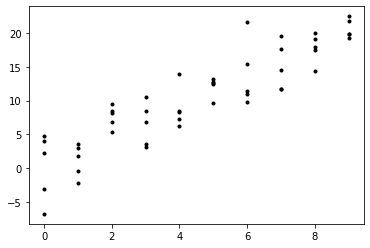

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rg = np.random.default_rng(42)
x = np.arange(0, 10, 1)
Y = np.zeros((10, 5))
for i in range(len(x)):
    Y[i] = 2*x[i]+1+4*rg.standard_normal(size = 5)

plt.plot(x, Y, 'k.')
plt.show()

Le but est de trouver les meilleurs paramètres $\alpha$ et $\beta$ pour ajuster nos données avec le modèle linéaire. Il est possible d'utiliser la méthode du maximum de vraissemblance pour trouver ces paramètres (voir cours). Dans cette séance, nous allons montrer que ces valeurs correspondent aux meilleurs paramètres au sens des moindres carrès.

Notons la fonction de régression
$$
 f(x; \alpha, \beta) = \alpha x + \beta. 
$$
Pour chaque valeur $x_i$ que prend $x$, on peut calculer la moyenne et la variance empirique de l'échantillon $(y_{i1}, \dots, y_{ik})$,
$$
\begin{cases}
 \overline{y}_i &= \dfrac{1}{k} \sum\limits_{j=1}^{k} y_{ij}\\
 \sigma^2_i &= \dfrac{1}{k-1} \sum\limits_{j=1}^{k} (y_{ij} - \overline{y}_i)^2.
\end{cases}   
$$
Pour chaque $x_i$, on aura
$$
 f(x_i; \alpha, \beta) = \overline{y}_i + \varepsilon_i 
$$
 où $\varepsilon_i$ représente l'écart aléatoire entre la valeur moyenne de l'échantillon et la valeur théorique donnée par la régression. $\varepsilon_i$ représente donc le bruit dans les données.

La méthode des moindres carrés consiste à minimiser l'erreur quadratique moyenne que l'on notera $S(\alpha, \beta)$,
$$
 \mathrm{arg}~\min_{\alpha, \beta} S(\alpha, \beta) = \mathrm{arg}~\min_{\alpha, \beta} \sum\limits_{i=1}^{n} \left(\overline{y}_i -f(x_i; \alpha, \beta) \right)^2
$$
 On remarque que cela revient à résoudre le problème suivant,
$$
 \mathrm{arg}~\min_{\alpha, \beta} || \varepsilon ||_2^2,
$$
et il s'agit donc de la minimisation d'une norme.
Comme le domaine de $S$ est convexe, que toute norme est convexe et que c'est un problème de minimisation, c'est un [problème d'optimisation convexe](https://en.wikipedia.org/wiki/Convex_optimization). Cela nous assure que tout minimum local de cette fonction sera également minimum global et solution optimale de notre problème.


Si nous tenons compte des erreurs de mesure sur chaque échantillon ($\sigma_i$), on minimisera la fonction
$$
\chi^2(\alpha, \beta) = \sum\limits_{i=1}^{n} \left( \dfrac{\overline{y}_i - f(x_i;\alpha,\beta)}{\sigma_i}\right)^2 = \sum\limits_{i=1}^{n} w_i \left( \overline{y}_i - f(x_i;\alpha,\beta)\right)^2.
$$

On accorde donc à chaque point moyen $(x_i, \overline{y}_i)$ un poids $w_i = 1/\sigma_i^2$. Ce poids est d'autant plus faible que l'erreur de mesure est grande. Cela ne change rien au fait qu'il faut minimiser la norme d'un vecteur. La solution optimale $(\hat{\alpha}, \hat{\beta})$ est donc donnée par
$$
\begin{cases}
   \dfrac{\partial \chi^2}{\partial \alpha}\Big\vert_{(\hat{\alpha}, \hat{\beta})} &= 0\\[1em]
   \dfrac{\partial \chi^2}{\partial \beta}\Big\vert_{(\hat{\alpha}, \hat{\beta})} &= 0
\end{cases}   
$$
et conduit à la résolution d'un système linéaire,
$$
\begin{pmatrix}
 \sum_{i=1}^{n} w_i x_i^2 & \sum_{i=1}^{n} w_i x_i \\
 \sum_{i=1}^{n} w_i x_i & \sum_{i=1}^{n} w_i
\end{pmatrix}
\cdot
\begin{pmatrix}
\hat{\alpha} \\[0.5em]
\hat{\beta}
\end{pmatrix}
=
\begin{pmatrix}
 \sum_{i=1}^{n} w_i \overline{y}_i x_i\\[0.5em]
 \sum_{i=1}^{n} w_i \overline{y}_i
\end{pmatrix}.
$$

On retrouve souvent la notation,

$$
S = \sum_i w_i \quad S_x = \sum_i w_i x_i \quad S_y = \sum_i w_i \overline{y}_i \quad S_{xy} = \sum_{i} w_i x_i \overline{y}_i \quad S_{xx} = \sum_i w_i x_i^2.
$$
On a alors,
$$
\begin{cases}
\hat{\alpha} &= \dfrac{S~S{xy} - S{x} S{y}}{\Delta}\\
\hat{\beta} &= \dfrac{S_Y S{xx} - S{x} S{xy}}{\Delta}
\end{cases}
$$
où
$$
\Delta = S~S_{xx} - S_{x}^2.
$$

Une fois cette régression optimale obtenue, on peut s'intéresser à la variance des données.
* La variance totale des données, souvent notée TSS (total sum of squares) ou $SS_{tot}$ est $\sum\limits_{i=1}^{n} w_i(\overline{y}_i - \overline{y})^2$
* La variance expliquée par le modèle, souvent notée ESS (explained sum of squares) ou $SS_{ex}$ est $\sum\limits_{i=1}^{n}  w_i (\hat{y}_i - \overline{y})^2$
* La variance résiduelle (non expliquée par le modèle), souvent notée RSS (residual sum of squared) ou  ou $SS_{res}$ est $\sum\limits_{i=1}^{n}  w_i (\overline{y}_i - \hat{y}_i)^2$

où $\overline{y} = \dfrac{1}{n} \sum_{i=1}^n \overline{y}_i$ et $\hat{y}_i = \hat{\alpha} x_i + \hat{\beta}$.

On a forcément la relation

$$
\text{TSS} = \text{ESS} + \text{RSS}
$$

Un bon modèle va expliquer une grande partie de la variance des données. On définit donc

$$
R^2 = \dfrac{\sum_{i=1}^{n}  w_i (\hat{y}_i - \overline{y})^2}{\sum_{i=1}^{n}  w_i (\overline{y}_i - \overline{y})^2}   
$$
le coéfficient de détermination. Plus la valeur du $R^2$ est proche de 1, plus le modèle explique bien la variation des données.

> Il est important de noter que $\hat{\alpha}, \hat{\beta}$ sont des variables aléatoires. Il s'agit des meilleurs estimateurs (au sens des moindres carrés ou du maximum de vraissemblance) de leurs valeurs théoriques. Comme ce sont des variables, on peut attribuer à chaque paramètre un écart-type (erreur d'estimation).

Lorsque l'on effectue l'ajustement linéaire on peut construire le vecteur aléatoire $P$ qui contient les deux paramètres,
$$
 P = 
\begin{pmatrix}
 \hat{\alpha} \\
 \hat{\beta}
\end{pmatrix} 
$$
auquel on peut associer la matrice de covariance $\text{Var}(P)$,
$$
\text{Var}(P) = 
\begin{pmatrix}
 \mathrm{Var}(\hat{\alpha}) & \mathrm{Cov}(\hat{\alpha}, \hat{\beta})\\
 \mathrm{Cov}(\hat{\beta}, \hat{\alpha}) & \mathrm{Var}(\hat{\beta})\\
\end{pmatrix}.
$$
En pratique, lors d'un ajustement, l'erreur sur le paramètres $P_i$ est donc la racine carrée de l'élément $\mathrm{Var}(P)_{ii}$.

Rappelons également que la corrélation entre $P_i$ et $P_j$ est donnée par,
$$
\text{Cor}(P_i, P_j) = \dfrac{\mathrm{Cov}(P_i, P_j)}{\sigma_{P_i} \sigma_{P_j}}.   
$$

Dans le cas de la régression linéaire, on a
$$
\text{Var}(P) = \dfrac{1}{\Delta}
\begin{pmatrix}
 S & -S_x\\
 -S_x & S_{xx}\\
\end{pmatrix}.
$$

Faisons un exemple avec nos données. On va remplacer chaque nuage de points par une valeur moyenne et un écart-type. On va ensuite comparer la régression linéaire ordinaire ($w_i$ constant $\forall i$) à la régression linéaire pondérée ($w_i = 1/\sigma_i^2$).

Pour faire une régression avec python, on utilise [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Il faut spécifier :
* la fonction à ajuster;
* le vecteur des $x_i$;
* le vecteur des $\overline{y}_i$.

Pour une régression pondérée, on spécifiera également l'argument `sigma`, vecteur qui contient les $\sigma_i$.

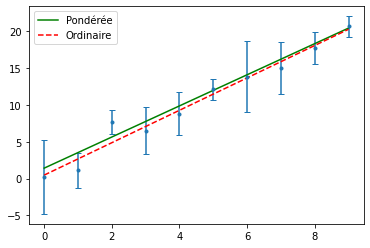

In [2]:
import scipy.optimize as sp_opt
sample_means = np.zeros(10)
sample_vars = np.zeros(10)
for i, ysample in enumerate(Y):
    sample_means[i] = np.mean(ysample)
    sample_vars[i] = np.var(ysample, ddof=1)

f = lambda x, a, b : a*x + b
# Régression pondérée
popt, perr = sp_opt.curve_fit(f, x, sample_means, sigma = np.sqrt(sample_vars))
# Régression ordinaire
popt2, perr2 = sp_opt.curve_fit(f, x, sample_means)

plt.errorbar(x, sample_means, np.sqrt(sample_vars), marker=".", linestyle = "", capsize = 3)
plt.plot(x, f(x, *popt), "g", label="Pondérée")
plt.plot(x, f(x, *popt2), "r--", label="Ordinaire")
plt.legend()
plt.show()

On voit que la régression ordinaire veut passer au plus proche de tous les $\overline{y}_i$ alors que la régression pondérée accorde plus d'importance aux points avec des petites barres d'erreurs.

[Retour en haut](#Table-des-matières)

## Méthodes bootstrap

Les méthodes bootstrap permettent de construire un intervalle de confiance pour n'importe quel paramètre (moyenne, variance, médianne, ...).

Considérons un ensemble de variables aléatoires $(X_1, \dots, X_n)$ identiquement distribuées selon une loi $F$. Une réalisation de cet échantillon aléatoire est
$$
(x_1, ..., x_n).
$$
Avec cet échantillon, on peut calculer une statistique $\hat{\theta}$, estimateur du paramètre $\theta$ de la loi $F$. On voudrait construire un intervalle de confiance pour ce paramètre.

Nous allons présenter une méthode numérique (faisable uniquement par ordinateur) pour construire un tel intervalle de confiance, le bootstrap. Il y a des livres entier consacrés à cette méthode, nous allons donc juste faire une introduction.

Pour plus d'infos :
1. [Computer Age Statistical Inference](https://web.stanford.edu/~hastie/CASI/)
2. [Bootstrap Methods and their Application](https://www.cambridge.org/core/books/bootstrap-methods-and-their-application/ED2FD043579F27952363566DC09CBD6A)

Intéressons nous d'abord au principe de base et regardons ensuite comment l'appliquer au cas de la régression.

### Idée générale

Pour pouvoir quantifier l'erreur d'estimation sur le paramètre $\theta$, c'est à dire $V(\hat{\theta})$, on utilise le principe suivant. On sait que la valeur $\hat{\theta}$ est calculée à partir d'une réalisation particulière d'un échantillon aléatoire de loi parente $F$. On peut le schématiser de la façon suivante :
$$
F \rightarrow (x_1, \dots, x_n) \rightarrow \hat{\theta}
$$
Pour pouvoir calculer $V(\hat{\theta})$, on a besoin de la distribution de $\hat{\theta}$. On ne connait pas $F$ mais on connait la distribution empirique $\hat{F}$ via notre échantillon. 

Puisqu'on doit avoir $\hat{F} \simeq F$, on peut créer des nouveaux échantillons à partir de $\hat{F}$ que l'on notera $(x_1^*, \dots, x_n^*)$. Avec ceux-ci, on peut estimer $\theta$. On notera cette estimation $\hat{\theta}^*$. En résumé,
$$
\hat{F} \rightarrow (x_1^*, \dots, x_n^*) \rightarrow \hat{\theta}^*
$$
Si on génère $B$ nouveaux échantillons, on a ainsi $B$ valeurs $\hat{\theta}^*$. L'erreur d'estimation sera alors
$$
\mathrm{V}(\hat{\theta}) = \dfrac{1}{B-1} \sum_{b = 1}^B \left( \hat{\theta}_b^* -  \overline{\hat{\theta}^*} \right)^2 \quad \text{où} \quad \overline{\hat{\theta}^*} = \dfrac{1}{B} \sum_{b=1}^B \hat{\theta}_b^*
$$

### Intervalle de confiance

Maintenant que nous avons présenté la méthode booststrap, nous pouvons construire un intervalle de confiance pour n'importe quel paramètre. En effet, après avoir obtenue $B$ valeurs $\hat{\theta}^*$, on a une distribution pour la statistique $\hat{\theta}$. Il suffit alors de prendre les fractiles d'ordre $\alpha/2$ et $1-\alpha/2$ de cette distribution pour créer un intervalle de confiance de niveau $1-\alpha$. On aura,
$$
I_{\alpha} = \left[\hat{\theta}^*_{\alpha/2};~\hat{\theta}^*_{1-\alpha/2} \right]
$$
En anglais, on appelle cette méthode "percentile bootstrap".

### Bootstrap non paramétrique

La méthode bootstrap sera non paramétrique si les nouveaux échantillons $(x_1^*, \dots, x_n^*)$ sont créés directement à partir de la distribution empirique $\hat{F}$ sans hypothèse sur celle-ci. Plus précisément, si on n'a aucune information sur $F$ et que l'on utilise juste la distribution empirique $\hat{F}$, cette distribution donne une probabilité d'apparition de $g_i/n$ à chaque valeur de l'échantillon où $g_i$ est le nombre de fois qu'apparaît $x_i$ dans l'échantillon. Un nouvel échantillon sera donc construit à partir d'un tirage avec remise de l'échantillon de départ $(x_1, \dots, x_n)$.

Prenons un exemple avec python.

In [3]:
sample = rg.binomial(4, 0.5, 8)
print("L'échantillon de départ est :\n", sample)
new_sample = rg.choice(sample, 8)
print("Le nouvel échantillon est :\n", new_sample)

L'échantillon de départ est :
 [3 2 3 3 2 2 1 1]
Le nouvel échantillon est :
 [3 2 2 3 1 2 3 1]


Un tirage avec remise s'effectue avec la méthode `choice` de notre générateur de nombres pseudo-aléatoires. Il faut spécifier le nombre de tirage à faire.

### Bootstrap paramétrique

La méthode boostrap sera paramétrique si les nouveaux échantillons $(x_1^*, \dots, x_n^*)$ sont créés à partir de la distribution $F$ pour laquelle les paramètres ont été estimés via l'échantillon de départ. Par exemple si notre échantillon de départ $(x_1, \dots, x_n)$ suit une loi normale, on peut estimer la moyenne et la variance de cette loi avec nos estimateurs sans biais. On utilise ensuite la loi normale avec ces deux paramètres pour générer les échantillons bootstrap $(x_1^*, \dots, x_n^*)$.

Par exemple, avec python : 
```python
sample = rg.normal(2, 1.3, 100)
mu = np.mean(sample)
sd = np.sqrt(np.var(sample, ddof=1))

new_sample = rg.normal(mu, sd, 100)
```

### Exemple : Intervalle de confiance pour la médiane

On a un échantillon dont on estime la médiane $m$, on obtient $\hat{m}$. On va maintenant construire un intervalle de confiance pour $m$ de niveau 95%. Nous utiliserons la méthode non paramétrique.

La médiane vaut 0.434, intervalle de confiance à 95% : [0.228; 0.705]
La vraie médiane est 0.347.


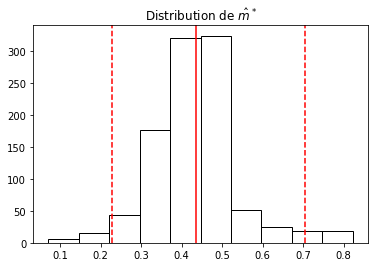

In [4]:
# Échantillon de départ
sample = rg.exponential(scale = 0.5, size = 20)

B = 1000
n = len(sample)
stat_values = np.zeros(B)
for b in range(B):
    # Échantillon bootstrap
    new_sample = rg.choice(sample, n)
    stat_values[b] = np.median(new_sample)
# Valeur moyenne des estimations bootstrap
med = np.mean(stat_values)
# Variance des estimations bootstrap
var_med = np.var(stat_values, ddof=1)
# Fractiles d'ordre 0.025 et 0.975 de la distribution des estimateurs
qinf = np.quantile(stat_values, 0.025)
qsup = np.quantile(stat_values, 0.975)

print("La médiane vaut %.3f, intervalle de confiance à 95%% : [%.3f; %.3f]" % (med, qinf, qsup))

# La médiane d'une loi exponentielle est beta*ln(2) ou beta est le facteur d'échelle
true_med = 0.5*np.log(2)
print("La vraie médiane est %.3f." % true_med)

plt.hist(stat_values, fill = False)
plt.title(r"Distribution de $\hat{m}^*$")
plt.axvline(med, color="r")
plt.axvline(qinf, color="r", linestyle="--")
plt.axvline(qsup, color="r", linestyle="--")
plt.show()

Pour calculer les fractiles, on utilse la fonction [`numpy.quantile`](https://numpy.org/devdocs/reference/generated/numpy.quantile.html).

[Retour en haut](#Table-des-matières)

## Application du bootstrap à la régression

Lorsque l'on fait une régression linéaire, on obtient une estimation pour la pente et une estimation pour l'ordonnée à l'origine, à partir des données de départ. On peut chercher à créer de nouvelles valeurs $(y_1^*, \dots, y_n^*)$ pour obtenir un intervalle de confiance pour la pente et pour l'ordonnée à l'origine.


### Méthode non-paramétrique

#### Situation 1

On considère ici que l'on a une seule valeur de $y_i$ pour chaque $x_i$. Dans cette méthode, on considère les résidus $\varepsilon_i$, $1\leq i\leq n$ de la première régression, définis par
$$
 \varepsilon_i = y_i - f(x_i; \hat{\alpha}, \hat{\beta}).
$$
On a donc un échantillon de $n$ résidus.

Dans ce cas, l'algorithme bootstrap se définit comme :

Pour $b$ allant de 1 à  $B$,
1. À partir de l'échantillon $(\varepsilon_1, ..., \varepsilon_n)$, on construit un échantillon bootstrap $(\varepsilon_1^*, ..., \varepsilon_n^*)$ via tirage avec remise. L'échantillon bootstrap sera de même taille ($n$) que celui de départ.
2. Construire un nouvel ensemble de variables dépendantes $y_i^* = f(x_i;\hat{\alpha}, \hat{\beta}) + \varepsilon_i^*$, $1 \leq i \leq n$.
3. Trouver les paramètres optimaux $\hat{\alpha}^*$, $\hat{\beta}^*$ aux sens des moindres carrés pour les nouveaux couples $(x_i, y_i^*)$.

La distribution bootstrap des deux paramètres va permettre de calculer un intervalle de confiance pour chacun d'eux.

Prenons un exemple.

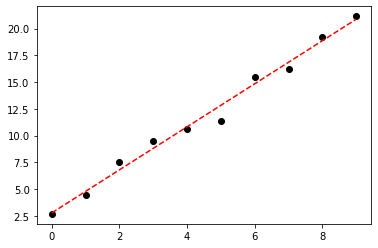

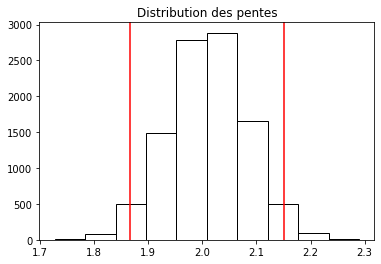

La pente est 2.010 (95% CI [1.867; 2.152])
L'ordonnée à l'origine est 2.781 (95% CI [1.977; 3.466])


In [5]:
# Données de départ
y = 2*x+3+rg.standard_normal(size = 10)
plt.figure(1)
plt.scatter(x, y, color='k')

def bootstrap(x, y, B=10000):
    n = len(x)
    f = lambda x, a, b: a*x+b
    # Régression à partir des données de départ
    popt, _ = sp_opt.curve_fit(f, x, y)
    yhat = f(x, *popt)
    res = y-yhat

    parameters = np.zeros((B, 2))
    for b in range(B):
        # On fait un tirage avec remise parmis les résidus
        res_b = rg.choice(res, size = n)
        # On construit des "nouvelles" variables dépendantes
        y_b = yhat + res_b
        # On réalise la régression
        popt, _ = sp_opt.curve_fit(f, x, y_b)
        parameters[b] = popt
    return parameters

parameters = bootstrap(x, y)
alpha_dist, beta_dist = parameters[:, 0], parameters[:, 1]
plt.plot(x, f(x, np.mean(alpha_dist), np.mean(beta_dist)), 'r--')
qinf = np.quantile(alpha_dist, 0.025)
qsup = np.quantile(alpha_dist, 0.975)

plt.figure(2)
plt.hist(alpha_dist, fill = False)
plt.title("Distribution des pentes")
plt.axvline(qinf, color="r")
plt.axvline(qsup, color="r")
plt.show()

print("La pente est %.3f (95%% CI [%.3f; %.3f])" % (np.mean(alpha_dist), qinf, qsup))
qinf = np.quantile(beta_dist, 0.025)
qsup = np.quantile(beta_dist, 0.975)
print("L'ordonnée à l'origine est %.3f (95%% CI [%.3f; %.3f])" % (np.mean(beta_dist), qinf, qsup))

#### Situation 2

On considère maintenant que pour chaque $x_{i}$, on a un échantillon de valeurs $(y_{i1}, \dots, y_{ik})$ mais que l'on n'a pas d'informations sur la distribution de ces échantillons.

On peut effectuer la méthode suivante :

Pour $b$ allant de 1 à  $B$,
1. Pour chaque échantillon $(y_{i1}, \dots, y_{ik})$, piocher une valeur $y_i^*$ aléatoirement. On a de cette manière $n$ valeurs $y^*_i$.
2. Trouver les paramètres optimaux $\hat{\alpha}^*$, $\hat{\beta}^*$ aux sens des moindres carrés pour les nouveaux couples $(x_i, y_i^*)$.

Avec python :

La pente est 1.988 (95% CI [1.895; 2.076])


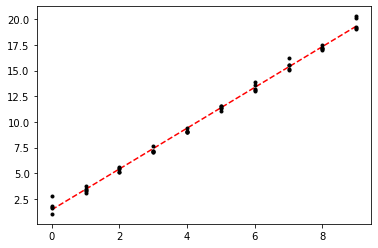

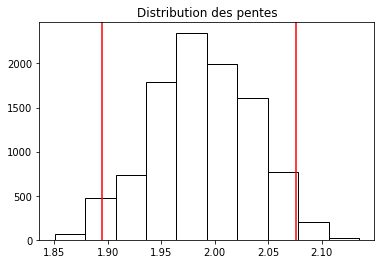

In [6]:
def bootstrap2(x, Y, B=10000):
    n = len(x)
    parameters = np.zeros((B, 2))
    f = lambda x, a, b: a*x+b
    for b in range(B):
        y_b = np.zeros(n)
        for j, y in enumerate(Y):
            y_b[j] = rg.choice(y)
        popt, _ = sp_opt.curve_fit(f, x, y_b)
        parameters[b] = popt
    return parameters


x = np.arange(0, 10, 1)
Y = np.zeros((10, 5))
for i in range(len(x)):
    Y[i] = 2*x[i]+1+rg.exponential(scale = 0.5, size = 5)

parameters = bootstrap2(x, Y)
alpha_dist, beta_dist = parameters[:, 0], parameters[:, 1]

qinf = np.quantile(alpha_dist, 0.025)
qsup = np.quantile(alpha_dist, 0.975)
print("La pente est %.3f (95%% CI [%.3f; %.3f])" % (np.mean(alpha_dist), qinf, qsup))


plt.figure(1)
plt.plot(x, f(x, np.mean(alpha_dist), np.mean(beta_dist)), 'r--')
plt.plot(x, Y, 'k.')
plt.show()

plt.figure(2)
plt.hist(alpha_dist, fill = False)
plt.title("Distribution des pentes")
plt.axvline(qinf, color="r")
plt.axvline(qsup, color="r")
plt.show()

### Méthode paramétrique

Finalement, regardons la situation où l'on a un échantillon de valeurs $(y_{i1}, \dots, y_{ik})$ pour chaque $x_i$ et que l'on connait la loi parente de l'échantillon.

Dans cette situation, au lieu de faire un tirage avec remise de $(y_{i1}, \dots, y_{ik})$, on peut créer le nouvel échantillon à partir de la loi parente pour laquelle on aura estimé les paramètres. De plus, si cette loi est normale et que l'on a estimé la variance de chaque échantillon, on pourra utiliser cette information pour effectuer une régression pondérée.

L'algorithme est alors :

1. Pour chaque échantillon $(y_{i1}, \dots, y_{ik})$, estimer les paramètres de la loi parente.
2. Pour $b$ allant de $1$ à $B$ :
    1. Pour $i$ allant de $1$ à $n$, tirer une valeur aléatoire $y_i^*$ de la loi parente de l'échantillon $(y_{i1}, \dots, y_{ik})$ avec les paramètres estimés.
    2. Trouver les paramètres optimaux $\hat{\alpha}^*$, $\hat{\beta}^*$, aux sens des moindres carrés, pour les nouveaux couples $(x_i, y_i^*)$. Si les échantillons $(y_{i1}, \dots, y_{ik})$ sont normaux, faire une régression pondérée avec $w_i = 1/\sigma_i^2$
    
On peut considérer un exemple avec python. On va construire la méthode pour des échantillons qui suivent une loi normale.

In [7]:
%matplotlib notebook
def bootstrap_norm(x, Y, B=10000, show_CI=False):
    f = lambda x, a, b: a*x + b
    n = len(x)
    means = np.zeros(n)
    sds = np.zeros(n)
    parameters = np.zeros((B, 2))
    for i, y in enumerate(Y):
        means[i] = np.mean(y)
        sds[i] = np.sqrt(np.var(y, ddof=1))
    for b in range(B):
        y_b = np.zeros(n)
        for i in range(n):
            y_b[i] = rg.normal(means[i], sds[i])
        popt, _ = sp_opt.curve_fit(f, x, y_b, sigma = sds)
        if show_CI:
            plt.plot(x, f(x, *popt), 'b', alpha=3e-3)
        parameters[b] = popt
    return parameters

x = np.arange(0, 10, 1)
Y = np.zeros((10, 10))
for i in range(len(x)):
    Y[i] = 2*x[i]+1+rg.standard_normal(size = 10)

plt.figure(1)
parameters = bootstrap_norm(x, Y, B=2000, show_CI=True)
alpha_dist = parameters[:, 0]
beta_dist = parameters[:, 1]

qinf = np.quantile(alpha_dist, 0.025)
qsup = np.quantile(alpha_dist, 0.975)
print("La pente est %.3f (95%% CI [%.3f; %.3f])" % (np.mean(alpha_dist), qinf, qsup))



plt.plot(x, f(x, np.mean(alpha_dist), np.mean(beta_dist)), 'r--')
plt.plot(x, Y, 'k.')
plt.show()

plt.figure(2)
plt.hist(alpha_dist, fill = False)
plt.title("Distribution des pentes")
plt.axvline(qinf, color="r")
plt.axvline(qsup, color="r")
plt.show()

<IPython.core.display.Javascript object>

La pente est 2.025 (95% CI [1.783; 2.258])


<IPython.core.display.Javascript object>

[Retour en haut](#Table-des-matières)